In [10]:
# Imports and set up

# For today’s newsletter, all you need is data. Import the OpenBB SDK to get it.

from openbb_terminal.sdk import openbb
# Now grab the data and compute the returns.

data_asset = openbb.stocks.load(
    symbol= "JPM",
    start_date="2014-01-01",
    end_date="2022-12-31"
)

data_bm = openbb.stocks.load(
    symbol= "JPM",
    start_date="2014-01-01",
    end_date="2022-12-31"
)

asset = data_asset["Adj Close"]
benchmark = data_bm["Adj Close"]

asset_returns = asset.pct_change().dropna()
benchmark_returns = benchmark.pct_change().dropna()
# This code pulls 8 years of stock price history, extracts the price data, and computes the daily returns. I use SPY as the benchmark, but you can use any benchmark you want.

Loading Daily data for JPM with starting period 2014-01-02.

Loading Daily data for JPM with starting period 2014-01-02.

In [11]:
data_asset

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
date,,,,,,,,
2014-01-02,45.029848,45.176574,44.767283,44.952621,44.952621,15627600,0.38,0.0
2014-01-03,45.014401,45.524086,44.952620,45.300133,45.300133,14214100,0.00,0.0
2014-01-06,45.686254,45.925653,45.431414,45.562695,45.562695,17550700,0.00,0.0
2014-01-07,45.786654,45.894768,44.875399,45.037571,45.037571,17851200,0.00,0.0
2014-01-08,45.207466,45.493198,45.022125,45.462307,45.462307,14687400,0.00,0.0
...,...,...,...,...,...,...,...,...
2022-12-23,128.613174,129.460221,127.687330,129.302628,129.302628,5091900,0.00,0.0
2022-12-27,129.588269,130.228473,128.583628,129.755707,129.755707,5411000,0.00,0.0
2022-12-28,129.864031,131.400531,129.036672,130.464844,130.464844,8827700,0.00,0.0


<AxesSubplot:xlabel='date'>

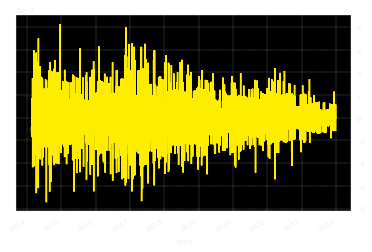

In [13]:
# Compute the Treynor ratio

# Start by computing beta.

bm_cov = benchmark_returns.rolling(
    window=30
).cov(asset_returns)

bm_var = benchmark_returns.rolling(
    window=30
).var()

beta = bm_cov / bm_var
# The beta coefficient is the covariance between the returns of the benchmark and the asset divided by the variance of the benchmark. Using pandas makes it easy to compute it.

# And finally, compute the Treynor ratio.

treynor = (
    asset_returns - benchmark_returns
) / beta

treynor.plot()